In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import edward as ed
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics.scorer import make_scorer

# from keras.utils import np_utils
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import Dropout
# from keras.constraints import maxnorm



C:\Users\Rhea\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('C:/Users/Rhea/Documents/Bayesian Modeling/Datasets/car_data.csv',names=['buying','maint','doors','persons','lug_boot','safety','classes'])

In [3]:
# Encode Data
df.buying.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
df.maint.replace(('vhigh','high','med','low'),(1,2,3,4), inplace=True)
df.doors.replace(('2','3','4','5more'),(1,2,3,4), inplace=True)
df.persons.replace(('2','4','more'),(1,2,3), inplace=True)
df.lug_boot.replace(('small','med','big'),(1,2,3), inplace=True)
df.safety.replace(('low','med','high'),(1,2,3), inplace=True)
df.classes.replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [5]:
df.dtypes

buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
classes     int64
dtype: object

In [6]:
features = ['buying','maint','doors','persons','lug_boot','safety']
X = (df[features])
y = (df['classes'])

In [7]:
X = X.astype(int)
y = y.astype(int)

In [8]:
X=X.values
y=y.values

In [9]:
Train_X,  Test_X,Train_Y, Test_Y = train_test_split(X,y,test_size=0.2, random_state=3)

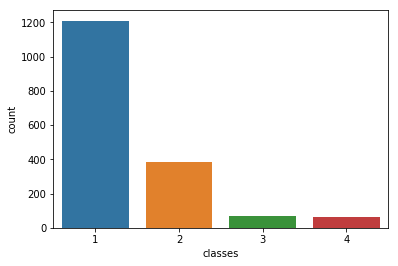

In [10]:
sns.countplot(x=df['classes'],data = df)

C:\Users\Rhea\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  
C:\Users\Rhea\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:201: RuntimeWarning: invalid value encountered in true_divide
  y = (s * row_).sum(axis=0) / row.sum()


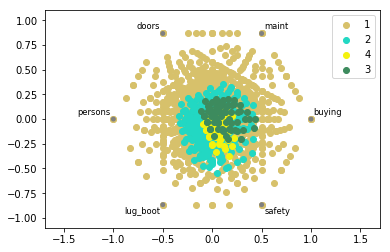

In [11]:
from pandas.tools.plotting import radviz
radviz(df, "classes")

Samples distributed among 'Classes' have a positive skew, with majority being in the 'unacc'(unacceptable),'acc'(acceptable) output class

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C32994C88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000016C32E09D30>]], dtype=object)

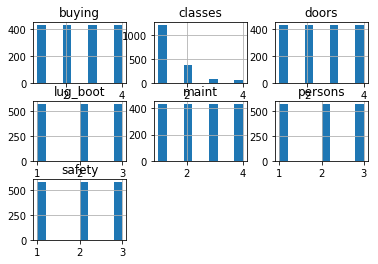

In [12]:
df.hist()

Every input feature seems evenly distributed, implying their multivariate interelation is what causes the skew in the 'classes'

####  Multilabel Classification Using K Nearest Neighbors  , Gaussian Naive Bayes Models

In [13]:
print(Train_X.shape)
print(Train_Y.shape)
print(Test_X.shape)
print(Test_Y.shape)

(1382, 6)
(1382,)
(346, 6)
(346,)


In [14]:
# create model
print ("Model: K Nearest Neighbors")
knn = KNeighborsClassifier()
# precision_knn = cross_val_score(knn, Train_X, Train_Y, cv=10, score_func=metrics.precision_recall_fscore_support )
# print ("Train Precision = {}".format(precision_knn.mean()))
# recall_knn = cross_val_score(knn, Train_X, Train_Y, cv=10, scoring='recall')
# print ("Train Recall = {}".format(recall_knn.mean()))
# f1score_knn = cross_val_score(knnv, Train_X, Train_Y, cv=10, scoring='f1')
# print ("Train F1 Score  = {}".format(f1score_knn.mean()))
accscore_knn = cross_val_score(knn, Train_X, Train_Y, cv=10, scoring='accuracy', n_jobs=-1)
print ("Accuracy score  = {}".format(accscore_knn.mean()))


Model: K Nearest Neighbors
Accuracy score  = 0.9217828983334193


In [15]:
knn.fit(X=Train_X,y=Train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
y_pred_knn=knn.predict(Test_X)

In [17]:
knn_report=sklearn.metrics.classification_report(Test_Y,y_pred_knn)
print(knn_report)
print("confusion matrix")
print(confusion_matrix(Test_Y, y_pred_knn))
print("accuracy score")
print(accuracy_score(Test_Y, y_pred_knn, normalize=True, sample_weight=None))

             precision    recall  f1-score   support

          1       0.95      0.99      0.97       232
          2       0.88      0.87      0.87        92
          3       0.80      0.50      0.62         8
          4       1.00      0.57      0.73        14

avg / total       0.93      0.93      0.93       346

confusion matrix
[[230   2   0   0]
 [ 11  80   1   0]
 [  1   3   4   0]
 [  0   6   0   8]]
accuracy score
0.93063583815


In [18]:
print ("Model: Gaussian Naive Bayes")
nb = GaussianNB() 

# precision_nb = cross_val_score(nb, Train_X, Train_Y, cv=10, scoring='precision')
# print ("Train Precision = {}".format(precision_nb.mean()))
# recall_nb = cross_val_score(nb, Train_X, Train_Y, cv=10, scoring='recall')
# print ("Train Recall = {}".format(recall_nb.mean()))
# f1score_nb = cross_val_score(nb, Train_X, Train_Y, cv=10, scoring='f1')
# print ("Train F1 Score  = {}".format(f1score_nb.mean()))
accscore_nb = cross_val_score(nb, Train_X, Train_Y, cv=10, scoring='accuracy', n_jobs=-1)
print ("Accuracy score  = {}".format(accscore_nb.mean()))

Model: Gaussian Naive Bayes
Accuracy score  = 0.6968562943118701


In [19]:
nb.fit(X=Train_X,y=Train_Y)

GaussianNB(priors=None)

In [20]:
y_pred_nb=nb.predict(Test_X)

In [21]:
y_pred_nb=nb.predict(Test_X)

In [22]:
nb_report=sklearn.metrics.classification_report(Test_Y,y_pred_nb)
print(nb_report)
print("confusion matrix")
print(confusion_matrix(Test_Y, y_pred_nb))
print("accuracy score")
print(accuracy_score(Test_Y, y_pred_nb, normalize=True, sample_weight=None))

             precision    recall  f1-score   support

          1       0.85      0.86      0.85       232
          2       0.76      0.24      0.36        92
          3       0.29      0.25      0.27         8
          4       0.19      1.00      0.31        14

avg / total       0.78      0.68      0.69       346

confusion matrix
[[199   6   0  27]
 [ 35  22   5  30]
 [  1   1   2   4]
 [  0   0   0  14]]
accuracy score
0.684971098266


#### Classification Accuracy of K Nearest Neighbors  is better than Gaussian Naive Bayes

## Probabilistic modeling in Edward 

In [23]:
import edward as ed
import tensorflow as tf

from edward.models import Bernoulli, MultivariateNormalTriL, Normal
from edward.util import rbf



### DATA

In [24]:
N = Train_X.shape[0]  # number of data points
D = Train_X.shape[1]  # number of features

print("Number of data points: {}".format(N))
print("Number of features: {}".format(D))

Number of data points: 1382
Number of features: 6


### MODEL

A Gaussian process is a powerful object for modeling nonlinear relationships between pairs of random variables. It defines a distribution over (possibly nonlinear) functions, which can be applied for representing our uncertainty around the true functional relationship. 

We use a radial basis function (RBF) kernel, also known as the squared exponential or exponentiated quadratic. It returns the kernel matrix evaluated over all pairs of data points; we then Cholesky decompose the matrix to parameterize the multivariate normal distribution.

In [25]:
# Define a placeholder X. During inference, we pass in the value for this placeholder according to data
X = tf.placeholder(tf.float32, [N, D])
f = MultivariateNormalTriL(loc=tf.zeros(N), scale_tril=tf.cholesky(rbf(X)))
y = Bernoulli(logits=f)

In [26]:
print(X.shape,Train_X.shape)
print(y.shape,Train_Y.shape)


(1382, 6) (1382, 6)
(1382,) (1382,)


### INFERENCE

In [27]:
qf = Normal(loc=tf.get_variable("qf/loc", [N]),
            scale=tf.nn.softplus(tf.get_variable("qf/scale", [N])))

In [28]:
inference = ed.KLqp({f: qf}, data={X: Train_X})
inference.run(n_iter=100)

100/100 [100%] ██████████████████████████████ Elapsed: 12s | Loss: 1535.555


In [29]:
inference = ed.KLqp({f: qf}, data={X: Train_X,y: Train_Y})
inference.run(n_iter=100)

100/100 [100%] ██████████████████████████████ Elapsed: 12s | Loss: 2021.523


In [30]:
inference = ed.KLqp({f: qf}, data={X: Train_X})
inference.run(n_iter=500)

500/500 [100%] ██████████████████████████████ Elapsed: 57s | Loss: 1146.509


In [31]:
inference = ed.KLqp({f: qf}, data={X: Train_X,y: Train_Y})
inference.run(n_iter=500)

500/500 [100%] ██████████████████████████████ Elapsed: 57s | Loss: 300.425


KLqp optimizes  model parameters p(z∣x;θ). It does this by variational EM, maximizing. 
<br>
The objective function also adds to itself a summation over all tensors in the REGULARIZATION_LOSSES collection.